In [1]:
# Income vs Donation

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive

In [7]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [89]:
# Read the data and see what we're dealing with

In [15]:
df = pd.read_csv('/content/drive/MyDrive/ivd.csv')

In [17]:
df.head(5)

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,3027.956120,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,2,1
1,1,12,3054.900065,2,70,5,9,3,2,2,...,4,2,5,2,1,8,3,3,2,1
2,1,13,3163.637766,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,1,1
3,1,14,3166.228463,2,70,5,9,3,2,2,...,3,2,4,1,1,6,3,2,1,1
4,1,15,3235.624715,2,70,5,9,3,2,2,...,3,2,4,2,1,8,3,3,1,1


In [90]:
# Look at all the weird columns that the Federal Reserve website has given us from its data

In [29]:
df.columns[300:]

Index(['PAYEDU5', 'PAYEDU6', 'PAYEDU7', 'PAYILN1', 'PAYILN2', 'PAYILN3',
       'PAYILN4', 'PAYILN5', 'PAYILN6', 'PAYILN7', 'PAYMARG', 'PAYINS',
       'PAYPEN1', 'PAYPEN2', 'PAYPEN3', 'PAYPEN4', 'PAYPEN5', 'PAYPEN6',
       'TPAY', 'MORTPAY', 'CONSPAY', 'REVPAY', 'PIRTOTAL', 'PIRMORT',
       'PIRCONS', 'PIRREV', 'PIR40', 'PLOAN1', 'PLOAN2', 'PLOAN3', 'PLOAN4',
       'PLOAN5', 'PLOAN6', 'PLOAN7', 'PLOAN8', 'LLOAN1', 'LLOAN2', 'LLOAN3',
       'LLOAN4', 'LLOAN5', 'LLOAN6', 'LLOAN7', 'LLOAN8', 'LLOAN9', 'LLOAN10',
       'LLOAN11', 'LLOAN12', 'NWCAT', 'INCCAT', 'ASSETCAT', 'NINCCAT',
       'NINC2CAT', 'NWPCTLECAT', 'INCPCTLECAT', 'NINCPCTLECAT', 'INCQRTCAT',
       'NINCQRTCAT'],
      dtype='object')

In [91]:
# put together the ones we need

In [32]:
df[['NETWORTH','KGTOTAL']]

,NETWORTH,KGTOTAL
0,762100.0,65000.0
1,854300.0,234000.0
2,678200.0,203000.0
3,279600.0,147000.0
4,602600.0,212000.0
...,...,...
22970,0.0,0.0
22971,0.0,0.0
22972,0.0,0.0
22973,0.0,0.0


In [92]:
# here we just don't take into account those with 0 income and as obvious the donations would all be 0

In [65]:
ivd = np.array(df[['NETWORTH','KGTOTAL']])
ivd = ivd[ivd[:,0] > 0]
ivd.shape

(21292, 2)

In [70]:
ivd

array([[762100.,  65000.],
       [854300., 234000.],
       [678200., 203000.],
       ...,
       [222860.,  93700.],
       [223280.,  93700.],
       [224190.,  94710.]])

In [93]:
# we just plut our data to see how it looks, unfourtunantly our data doesn't have a great homoscedasticity, yet we'll go with it

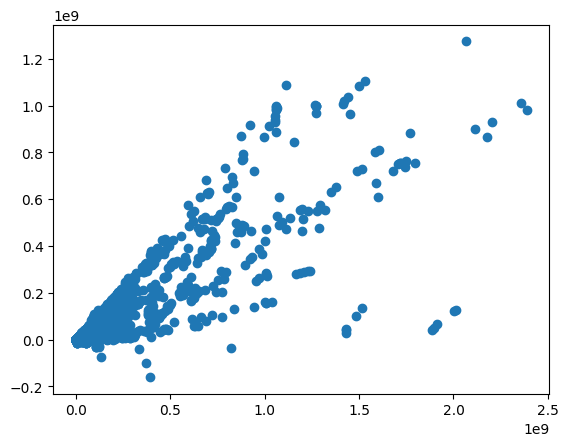

In [72]:
plt.scatter(ivd[:,0], ivd[:,1])

In [94]:
# we just seprate our x and y's

In [73]:
x = ivd[:,0]
y = ivd[:,1]

In [100]:
# using the pearson correlation coefficient formula we see take a look at their correlation and we see that they have a quite ok correlation which is good news
# we could also instead of the raw formula use the following:
# np.corrcoef(x,y)[0,1]
# gives us the same output but I just like using a little bit of mathematics by hand

In [97]:
r = np.sum((x - x.mean()) * (y-y.mean())) / np.sqrt(np.sum((x-x.mean()) ** 2) * np.sum((y-y.mean()) ** 2))
r

np.float64(0.875186602155606)

In [102]:
# Actual magic (math) happens here
# you might be wondering where these formulas come from, it's just deriving (y-y') which is our error we want to minimize and with a little bit of calculus and familiarity with linear relations (ax+b) you'll get it
# you may as well refer to this video "Deriving the least squares estimators of the slope and intercept (simple linear regression)" from jbstatistics

In [79]:
b1 = np.sum((x-x.mean()) * (y-y.mean()))/ np.sum((x-x.mean()) ** 2)
b0 = y.mean() - b0*x.mean()

In [80]:
b1

np.float64(0.46575496945990363)

In [81]:
b0

np.float64(-100324.2098989524)

In [83]:
yP = b1*x + b0
yP

array([254627.65232644, 297570.26051064, 215550.81038875, ...,
         3473.94259488,   3669.55968205,   4093.39670426])

In [103]:
# we plot our output :)

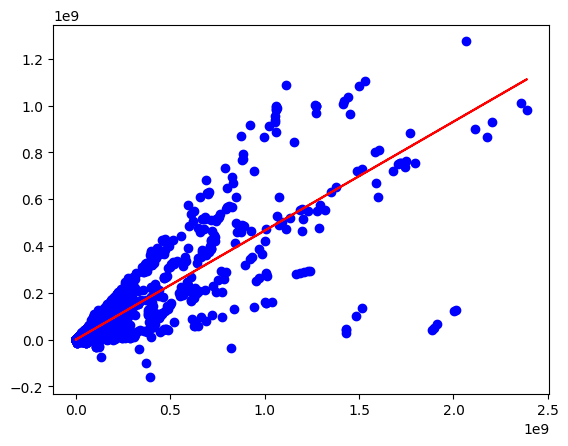

In [85]:
plt.scatter(x, y, color="blue", label="Data points")
plt.plot(x, yP, color="red", label="Regression line")

In [ ]:
# Elon Musks Networth: $424.5B

In [87]:
ElonPredDonation = b1*424500000000 + b0
ElonPredDonation

np.float64(197712884211.5192)

Above we see that our prediction for Elon Musk's Donation is around 197B however the rough estimate of how much he has overall donated possibly is approximately around $7.5B nothing close, thus this proves that in real life examples nothing is linear and there's possibly a threshold for this as well in which the prediction starts to fail to work and it's all about data, and how much data we have, our sample was relatively small therefore we can't account for everything :)

In [101]:
# we calculate the r^2 to see how much better our line does when taking into consideration our other variable
# think of it like this (if we were to just geuss the number we predict based off of one's income how would we do it? we'd just give the average of all the numbers) and here what we just do is to see how much better we can predict kind of relative to just saying the mean

In [113]:
r**2

np.float64(0.7659515885926749)

In [115]:
# We may also calculate our error by standard error of estimates (we will get a huge number and that's due to the scale of our data)

In [111]:
# np.sqrt(np.sum((y-yP) ** 2)/(len(x) - 2))
np.sqrt(np.sum((y - yP)**2) / (len(x) - 2))

np.float64(29426613.576568417)